In [22]:
import pandas as pd

#configurar pandas para que muestre todos los decimales
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Cargar el archivo Excel
file_path = 'realtor-data.csv'
df_real_state = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset
df_real_state.head()


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.000,for_sale,105000.000,3.000,2.000,0.120,1962661.000,Adjuntas,Puerto Rico,601.000,920.000,NaN
1,52707.000,for_sale,80000.000,4.000,2.000,0.080,1902874.000,Adjuntas,Puerto Rico,601.000,1527.000,NaN
2,103379.000,for_sale,67000.000,2.000,1.000,0.150,1404990.000,Juana Diaz,Puerto Rico,795.000,748.000,NaN
3,31239.000,for_sale,145000.000,4.000,2.000,0.100,1947675.000,Ponce,Puerto Rico,731.000,1800.000,NaN
4,34632.000,for_sale,65000.000,6.000,2.000,0.050,331151.000,Mayaguez,Puerto Rico,680.000,NaN,NaN


In [23]:
df_real_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [24]:
# Verificar valores nulos
df_real_state.isnull().sum()

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

In [25]:
#borrar valores nulos de la columna 'price'
df_real_state = df_real_state.dropna(subset=['price'])

In [26]:
# Verificar valores nulos
df_real_state.isnull().sum()

brokered_by         4533
status                 0
price                  0
bed               480861
bath              510992
acre_lot          325140
street             10864
city                1404
state                  8
zip_code             298
house_size        567874
prev_sold_date    733256
dtype: int64

<Axes: >

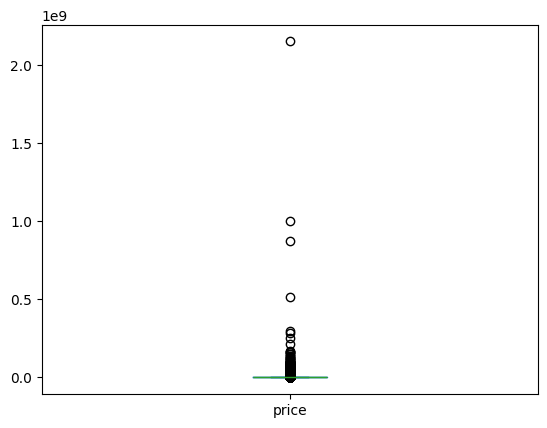

In [27]:
# boxplot de la columna 'price'
df_real_state['price'].plot(kind='box')

<Axes: >

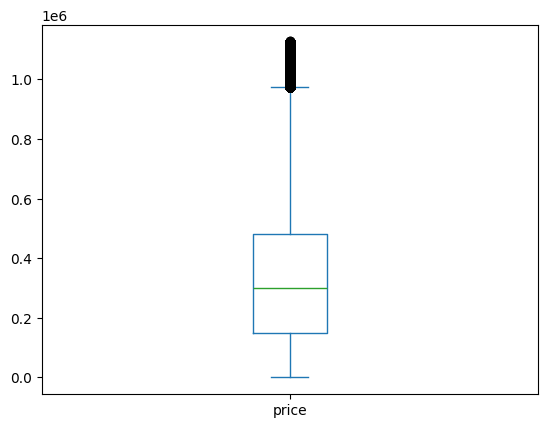

In [28]:
# borrar valores atípicos de la columna 'price' con metodo de IQR (Rango intercuartil) 
Q1 = df_real_state['price'].quantile(0.25)
Q3 = df_real_state['price'].quantile(0.75)
IQR = Q3 - Q1
df_real_state = df_real_state[~((df_real_state['price'] < (Q1 - 1.5 * IQR)) |(df_real_state['price'] > (Q3 + 1.5 * IQR)))]
df_real_state['price'].plot(kind='box')


In [29]:
df_real_state['price'].describe()

count   2053241.000
mean     342844.096
std      244575.194
min           0.000
25%      150000.000
50%      299900.000
75%      479900.000
max     1127500.000
Name: price, dtype: float64

In [30]:
df_real_state.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2053241 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.6+ MB


<Axes: ylabel='Frequency'>

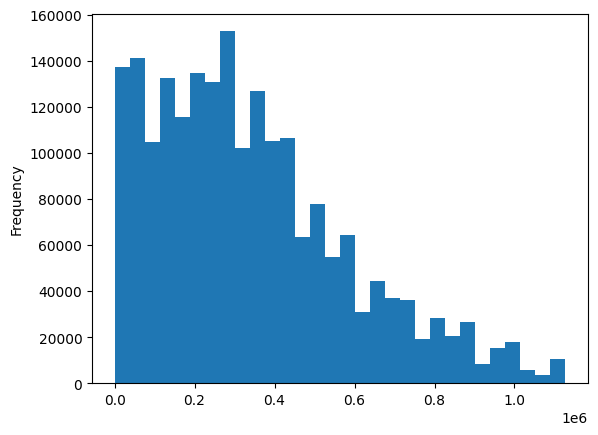

In [31]:
# histograma de la columna 'price'
df_real_state['price'].plot(kind='hist', bins=30)

In [32]:
from sklearn.impute import SimpleImputer

# Crear el imputador
imputer = SimpleImputer(strategy='median')

# Columnas numéricas a imputar
num_cols = ['bed', 'bath', 'house_size', 'acre_lot']

# Imputar valores nulos
df_real_state[num_cols] = imputer.fit_transform(df_real_state[num_cols])

# Verificar que no queden valores nulos en las columnas imputadas
df_real_state[num_cols].isnull().sum()


bed           0
bath          0
house_size    0
acre_lot      0
dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder

# Crear el codificador
encoder = LabelEncoder()

# Columnas categóricas a codificar
cat_cols = ['status', 'city', 'state']

# Codificar columnas categóricas
for col in cat_cols:
    df_real_state[col] = encoder.fit_transform(df_real_state[col])

# Mostrar primeras filas del dataset codificado
df_real_state.head()


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.000,0,105000.000,3.000,2.000,0.120,1962661.000,89,41,601.000,920.000,NaN
1,52707.000,0,80000.000,4.000,2.000,0.080,1902874.000,89,41,601.000,1527.000,NaN
2,103379.000,0,67000.000,2.000,1.000,0.150,1404990.000,8664,41,795.000,748.000,NaN
3,31239.000,0,145000.000,4.000,2.000,0.100,1947675.000,14115,41,731.000,1800.000,NaN
4,34632.000,0,65000.000,6.000,2.000,0.050,331151.000,10776,41,680.000,1700.000,NaN


In [34]:
df_real_state.isnull().sum()

brokered_by         4169
status                 0
price                  0
bed                    0
bath                   0
acre_lot               0
street              9596
city                   0
state                  0
zip_code             255
house_size             0
prev_sold_date    679558
dtype: int64

In [35]:
# borrar estas columnas porque no aportan información relevante , 'prev_sold_date','brokered_by','prev_sold_date','zip_code',"street"
df_real_state = df_real_state.drop(columns=['prev_sold_date','status','brokered_by','prev_sold_date','zip_code',"street"])

In [36]:
# borrar líneas cuando la columna 'price' sea nula
df_real_state = df_real_state.dropna(subset=['price'])

In [37]:
from sklearn.model_selection import train_test_split

# Definir características y variable objetivo
X = df_real_state.drop(columns=['price'])
y = df_real_state['price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
df_real_state.head()

,price,bed,bath,acre_lot,city,state,house_size
0,105000.000,3.000,2.000,0.120,89,41,920.000
1,80000.000,4.000,2.000,0.080,89,41,1527.000
2,67000.000,2.000,1.000,0.150,8664,41,748.000
3,145000.000,4.000,2.000,0.100,14115,41,1800.000
4,65000.000,6.000,2.000,0.050,10776,41,1700.000


In [39]:
from sklearn.ensemble import RandomForestRegressor

# Crear y entrenar el modelo
model = RandomForestRegressor(n_estimators=150, random_state=42)
model.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Hacer predicciones
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mae, mse, rmse, r2


# calcular la accuracy del modelo
accuracy = model.score(X_test, y_test)

In [ ]:
accuracy

0.7199680888598359

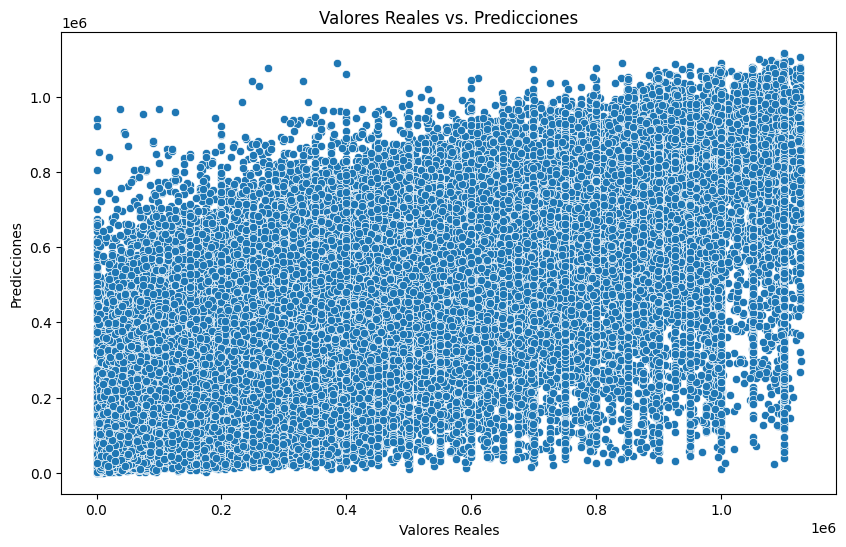

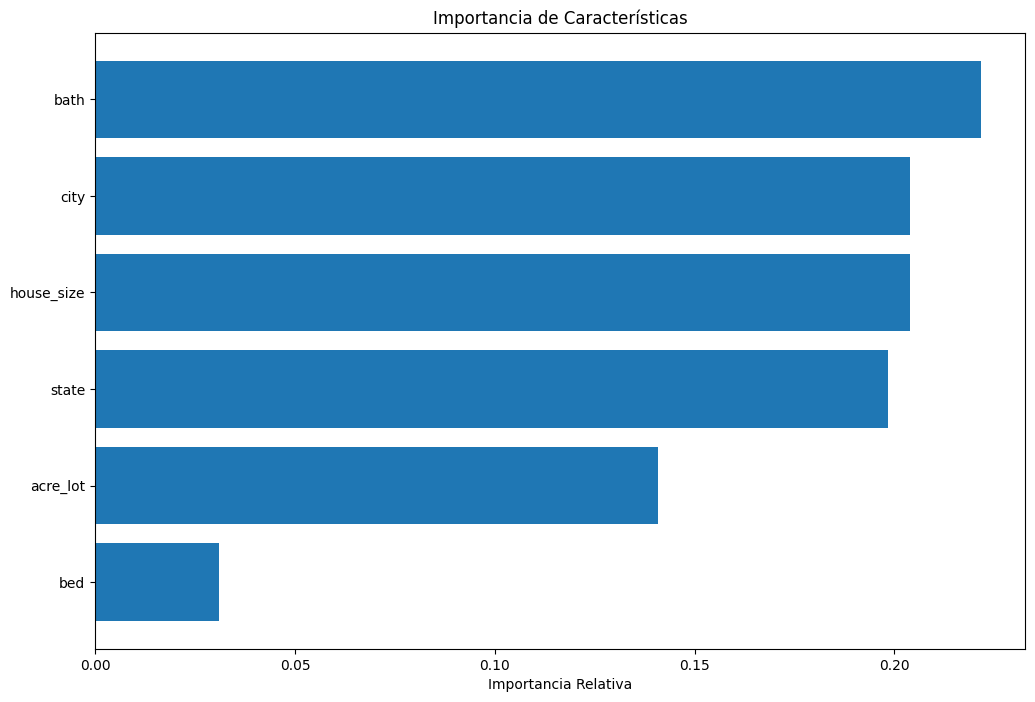

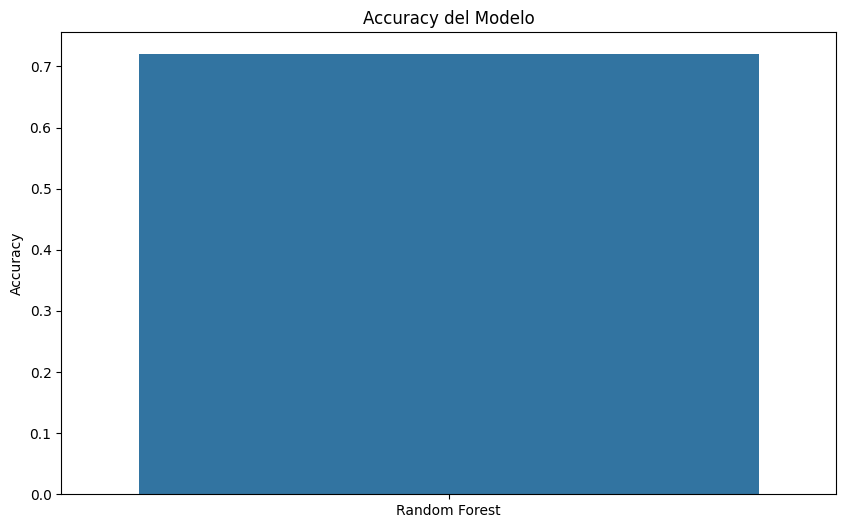

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de importancia de características
plt.figure(figsize=(12, 8))
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia Relativa')
plt.title('Importancia de Características')
plt.gca().invert_yaxis()
plt.show()

# crear un gráfico con dos curvas, una para los valores reales y otra para las predicciones ordenadas de menor a mayor valor de 'price'

# Crear un DataFrame con los valores reales y las predicciones
df_results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
df_results = df_results.sort_values('y_test').reset_index(drop=True)

# Gráfico de curvas
plt.figure(figsize=(12, 8))
plt.plot(df_results['y_test'], label='Valores Reales')
plt.plot(df_results['y_pred'], label='Predicciones')
plt.xlabel('Índice')
plt.ylabel('Precio')
plt.title('Valores Reales vs. Predicciones')
plt.legend()
plt.show()